In [1]:
import os
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt

import wave
from scipy.io import wavfile
import librosa
import soundfile as sf

## Generate and prepare audio files

In [2]:
subid = ['02']

In [3]:
program_path = r'E:\Post_log\Voice_Imagery\Exp\Exp_preparation\Voice imagery task\Program_psychopy\Voice_listening_task'
stimuli_data = pd.read_excel(os.path.join(program_path, 'Sub'+subid[0],
                                          'stimulus', 'Stimulus416.xlsx'))

In [4]:
stimuli_data

,sentenceID,category,mid_category,sub_category,sentences_list,condition,StimulusID
0,53,Concrete,Nature & Enviroment,Animal & Plant,窗台上的绿植需要每天浇一次水。,celebrity,1
1,458,Concrete,Music - Con,Music - Con,刚擒住了几个妖又降住了几个魔。,celebrity,2
2,37,Concrete,Daily Life,Digital,直播间里观众纷纷抢购限量商品。,celebrity,3
3,215,Concrete,Emotion Expression - Con,Sadness - Con,深夜醒来我感到无比的孤独无助。,celebrity,4
4,277,Abstract,Personal Feelings,Social Feelings,在团队中寻找到的一定归属之感。,celebrity,5
...,...,...,...,...,...,...,...
411,470,Concrete,Music - Con,Music - Con,你这该死的温柔让我心在痛泪在流。,unfamiliar,412
412,459,Concrete,Music - Con,Music - Con,如果再看你一眼是否还会有感觉。,unfamiliar,413
413,218,Concrete,Emotion Expression - Con,Anger - Con,交通堵塞时候一直被后车按喇叭。,unfamiliar,414
414,66,Concrete,Nature & Enviroment,Animal & Plant,一只老黄牛在田间低头慢步吃草。,unfamiliar,415


## Normalize audio speed to 3s

In [5]:
def process_audio_to_3s_librosa(input_file, output_file):
    try:
        # 加载音频文件
        y, sr = librosa.load(input_file, sr=None)
        
        # 计算当前时长（秒）
        current_duration = len(y) / sr
        target_duration = 3.0  # 3秒
        
        print(f"处理文件: {os.path.basename(input_file)}")
        print(f"原始时长: {current_duration:.3f}秒")
        
        # 计算需要的时间拉伸比例
        stretch_ratio = current_duration / target_duration
        print(f"时间拉伸比例: {stretch_ratio:.3f}x")
        
        # 使用librosa的高质量时间拉伸
        y_stretched = librosa.effects.time_stretch(y, rate=stretch_ratio)
        
        # 计算处理后的时长
        processed_duration = len(y_stretched) / sr
        print(f"处理后时长: {processed_duration:.3f}秒")
        
        # 确保输出文件夹存在
        os.makedirs(os.path.dirname(output_file), exist_ok=True)
        
        # 导出文件
        sf.write(output_file, y_stretched, sr)
        
        # 验证输出文件
        y_verify, _ = librosa.load(output_file, sr=None)
        final_duration = len(y_verify) / sr
        print(f"最终文件时长: {final_duration:.3f}秒")
        
        # 检查精度
        if abs(final_duration - target_duration) <= 0.01:  # 10毫秒精度
            print(f"✓ 成功导出: {os.path.basename(output_file)} (精度: ±10ms)")
            return True
        else:
            print(f"! 时长偏差: 目标{target_duration:.3f}秒, 实际{final_duration:.3f}秒")
            return True
            
    except Exception as e:
        print(f"处理文件 {input_file} 时出错: {str(e)}")
        return False

In [9]:
voice_base = r'E:\Post_log\Voice_Imagery\Exp\Exp_preparation\Voice imagery task\Stimulus\Speech'
# inp = r'E:\Post_log\Voice_Imagery\Exp\Exp_preparation\Voice imagery task\Stimulus\Speech\Familiar\王一斌\s1'
# outp = r'E:\Post_log\Voice_Imagery\Exp\Exp_preparation\Voice imagery task\Stimulus\Speech\Familiar\王一斌\变速'
# inp = r'E:\Post_log\Voice_Imagery\Exp\Exp_preparation\Voice imagery task\Stimulus\Speech\Celebrity\杨幂\s1'
# outp = r'E:\Post_log\Voice_Imagery\Exp\Exp_preparation\Voice imagery task\Stimulus\Speech\Celebrity\杨幂\变速'
# inp = r'E:\Post_log\Voice_Imagery\Exp\Exp_preparation\Voice imagery task\Stimulus\Speech\Unfamiliar\Sub02\吴婷婷\lab'
# outp = r'E:\Post_log\Voice_Imagery\Exp\Exp_preparation\Voice imagery task\Stimulus\Speech\Unfamiliar\Sub02\吴婷婷\变速'
inp = r'E:\Post_log\Voice_Imagery\Exp\Exp_preparation\Voice imagery task\Stimulus\Speech\Unfamiliar\Sub02\史冬平\unfamiliar'
outp = r'E:\Post_log\Voice_Imagery\Exp\Exp_preparation\Voice imagery task\Stimulus\Speech\Unfamiliar\Sub02\史冬平\变速'
# 确保输出目录存在
os.makedirs(outp, exist_ok=True)

# 检查输入目录是否存在
if not os.path.exists(inp):
    print(f"错误: 输入目录不存在 - {inp}")
else:
    # 获取文件列表
    files = [f for f in os.listdir(inp) if f.lower().endswith(('.wav', '.mp3'))]
    
    if not files:
        print("在输入文件夹中未找到WAV或MP3文件")
    else:
        print(f"找到 {len(files)} 个音频文件")
        print("=" * 60)
        
        success_count = 0
        # 处理每个文件
        for filename in files:
            input_path = os.path.join(inp, filename)
            # 保持原格式或统一转换为WAV
            output_filename = os.path.splitext(filename)[0] + '.wav'
            output_path = os.path.join(outp, output_filename)
            
            if process_audio_to_3s_librosa(input_path, output_path):
                success_count += 1

        print(f"处理完成! 成功处理 {success_count}/{len(files)} 个文件")
        
        # 如果有失败的文件，列出它们
        if success_count < len(files):
            failed_count = len(files) - success_count
            print(f"有 {failed_count} 个文件处理失败")

找到 104 个音频文件
处理文件: Voice_Stimulus_001.wav
原始时长: 2.580秒
时间拉伸比例: 0.860x
处理后时长: 3.000秒
最终文件时长: 3.000秒
✓ 成功导出: Voice_Stimulus_001.wav (精度: ±10ms)
处理文件: Voice_Stimulus_002.wav
原始时长: 2.990秒
时间拉伸比例: 0.997x
处理后时长: 3.000秒
最终文件时长: 3.000秒
✓ 成功导出: Voice_Stimulus_002.wav (精度: ±10ms)
处理文件: Voice_Stimulus_003.wav
原始时长: 3.240秒
时间拉伸比例: 1.080x
处理后时长: 3.000秒
最终文件时长: 3.000秒
✓ 成功导出: Voice_Stimulus_003.wav (精度: ±10ms)
处理文件: Voice_Stimulus_004.wav
原始时长: 3.010秒
时间拉伸比例: 1.003x
处理后时长: 3.000秒
最终文件时长: 3.000秒
✓ 成功导出: Voice_Stimulus_004.wav (精度: ±10ms)
处理文件: Voice_Stimulus_005.wav
原始时长: 2.700秒
时间拉伸比例: 0.900x
处理后时长: 3.000秒
最终文件时长: 3.000秒
✓ 成功导出: Voice_Stimulus_005.wav (精度: ±10ms)
处理文件: Voice_Stimulus_006.wav
原始时长: 2.670秒
时间拉伸比例: 0.890x
处理后时长: 3.000秒
最终文件时长: 3.000秒
✓ 成功导出: Voice_Stimulus_006.wav (精度: ±10ms)
处理文件: Voice_Stimulus_007.wav
原始时长: 2.820秒
时间拉伸比例: 0.940x
处理后时长: 3.000秒
最终文件时长: 3.000秒
✓ 成功导出: Voice_Stimulus_007.wav (精度: ±10ms)
处理文件: Voice_Stimulus_008.wav
原始时长: 3.150秒
时间拉伸比例: 1.050x
处理后时长: 3.000秒
最终文件时长: 3.000

## Copy audio files respond to Stimulus from speech folders to stimulus folders under program forder

In [13]:
import pandas as pd
import os
import shutil

def get_audio_duration(file_path):
    """获取音频文件的时长（秒）"""
    try:
        # 方法1: 使用wave模块
        with wave.open(file_path, 'rb') as audio_file:
            frames = audio_file.getnframes()
            rate = audio_file.getframerate()
            duration = frames / float(rate)
            return duration
    except:
        try:
            # 方法2: 使用scipy.io.wavfile（备用方法）
            rate, data = wavfile.read(file_path)
            duration = len(data) / float(rate)
            return duration
        except Exception as e:
            print(f"无法读取文件 {file_path}: {e}")
            return None

# 定义路径
lab_path = r'E:\Post_log\Voice_Imagery\Exp\Exp_preparation\Voice imagery task\Stimulus\Speech\Unfamiliar\Sub02\吴婷婷\变速'
unfamiliar_path = r'E:\Post_log\Voice_Imagery\Exp\Exp_preparation\Voice imagery task\Stimulus\Speech\Unfamiliar\Sub02\史冬平\变速'
celebrity_path = r'E:\Post_log\Voice_Imagery\Exp\Exp_preparation\Voice imagery task\Stimulus\Speech\Celebrity\杨幂\变速'
familiar_path = r'E:\Post_log\Voice_Imagery\Exp\Exp_preparation\Voice imagery task\Stimulus\Speech\Familiar\王一斌\变速'

stimulus_path = r'E:\Post_log\Voice_Imagery\Exp\Exp_preparation\Voice imagery task\Program_psychopy\Voice_listening_task\Sub02\stimulus'
lab_stimuli_path = os.path.join(stimulus_path, 'lab')
unfamiliar_stimuli_path = os.path.join(stimulus_path, 'unfamiliar')
familiar_stimuli_path = os.path.join(stimulus_path, 'familiar')
celebrity_stimuli_path = os.path.join(stimulus_path, 'celebrity')

# 确保所有目标目录存在
for path in [lab_stimuli_path, unfamiliar_stimuli_path, familiar_stimuli_path, celebrity_stimuli_path]:
    os.makedirs(path, exist_ok=True)

# 初始化Stimulus_path列
stimuli_data['Stimulus_path'] = ''

# 处理celebrity条件的刺激
celebrity_data = stimuli_data[stimuli_data['condition'] == 'celebrity'].copy()
for idx, row in celebrity_data.iterrows():
    # 对于celebrity，StimulusID就是文件编号（1-104）
    file_number = row['StimulusID']
    # 原始文件名
    original_filename = f"Voice_Stimulus_{file_number:03d}.wav"
    # 新文件名
    new_filename = f"Voice_Stimulus_{file_number:03d}_sentence{row['sentenceID']}.wav"
    # 原始文件路径
    original_file_path = os.path.join(celebrity_path, original_filename)
    # 新文件路径
    new_file_path = os.path.join(celebrity_stimuli_path, new_filename)
    
    # 如果原始文件存在，则重命名
    if os.path.exists(original_file_path):
        shutil.copy2(original_file_path, new_file_path)
        # 存储相对路径
        stimuli_data.loc[idx, 'Stimulus_path'] = f"stimulus\\celebrity\\{new_filename}"
    else:
        print(f"警告: 文件不存在 - {original_file_path}")

# 处理familiar条件的刺激
familiar_data = stimuli_data[stimuli_data['condition'] == 'familiar'].copy()
# 对familiar条件的刺激重新编号（从1开始）
familiar_data = familiar_data.sort_values('StimulusID').reset_index(drop=True)
familiar_data['file_number'] = range(1, len(familiar_data) + 1)

for idx, row in familiar_data.iterrows():
    # 对于familiar，文件编号从1开始重新编号
    file_number = row['file_number']
    # 原始文件名
    original_filename = f"Voice_Stimulus_{file_number:03d}.wav"
    # 新文件名（使用原始的StimulusID）
    new_filename = f"Voice_Stimulus_{row['StimulusID']:03d}_sentence{row['sentenceID']}.wav"
    # 原始文件路径
    original_file_path = os.path.join(familiar_path, original_filename)
    # 新文件路径
    new_file_path = os.path.join(familiar_stimuli_path, new_filename)
    
    # 如果原始文件存在，则重命名
    if os.path.exists(original_file_path):
        shutil.copy2(original_file_path, new_file_path)
        # 存储相对路径
        stimuli_data.loc[idx+104, 'Stimulus_path'] = f"stimulus\\familiar\\{new_filename}"
    else:
        print(f"警告: 文件不存在 - {original_file_path}")

# 处理lab条件的刺激
lab_data = stimuli_data[stimuli_data['condition'] == 'lab'].copy()
lab_data = lab_data.sort_values('StimulusID').reset_index(drop=True)
lab_data['file_number'] = range(1, len(lab_data) + 1)
for idx, row in lab_data.iterrows():
    # 源文件名（基于sentenceID）
    file_number = row['file_number']
    original_filename = f"Voice_Stimulus_{file_number:03d}.wav"
    # 目标文件名（基于StimulusID）
    new_filename = f"Voice_Stimulus_{row['StimulusID']:03d}_sentence{row['sentenceID']}.wav"
    # 源文件路径
    original_file_path = os.path.join(lab_path, original_filename)
    # 目标文件路径
    new_file_path = os.path.join(lab_stimuli_path, new_filename)
    
    # 如果源文件存在，则复制到目标位置
    if os.path.exists(original_file_path):
        shutil.copy2(original_file_path, new_file_path)
        # 存储相对路径
        stimuli_data.loc[idx+208, 'Stimulus_path'] = f"stimulus\\lab\\{new_filename}"
    else:
        print(f"警告: 文件不存在 - {original_file_path}")

# 处理unfamiliar条件的刺激
unfamiliar_data = stimuli_data[stimuli_data['condition'] == 'unfamiliar'].copy()
unfamiliar_data = unfamiliar_data.sort_values('StimulusID').reset_index(drop=True)
unfamiliar_data['file_number'] = range(1, len(unfamiliar_data) + 1)
for idx, row in unfamiliar_data.iterrows():
    # 源文件名（基于sentenceID）
    file_number = row['file_number']
    original_filename = f"Voice_Stimulus_{file_number:03d}.wav"
    # 目标文件名（基于StimulusID）
    new_filename = f"Voice_Stimulus_{row['StimulusID']:03d}_sentence{row['sentenceID']}.wav"
    # 源文件路径
    original_file_path = os.path.join(unfamiliar_path, original_filename)
    # 目标文件路径
    new_file_path = os.path.join(unfamiliar_stimuli_path, new_filename)
    
    # 如果源文件存在，则复制到目标位置
    if os.path.exists(original_file_path):
        shutil.copy2(original_file_path, new_file_path)
        # 存储相对路径
        stimuli_data.loc[idx+312, 'Stimulus_path'] = f"stimulus\\unfamiliar\\{new_filename}"
    else:
        print(f"警告: 文件不存在 - {original_file_path}")

# 添加时长信息到stimuli_data
print("\n=== 添加音频时长信息 ===")
stimuli_data['duration'] = 0.0  # 初始化时长列

# 获取基础目录（stimulus_path的上级目录）
base_dir = os.path.dirname(stimulus_path)

for idx, row in stimuli_data.iterrows():
    if row['Stimulus_path']:  # 如果路径不为空
        # 构建完整文件路径
        full_path = os.path.join(base_dir, row['Stimulus_path'])
        
        # 获取音频时长
        duration = get_audio_duration(full_path)
        
        if duration is not None:
            stimuli_data.loc[idx, 'duration'] = duration
        else:
            print(f"警告: 无法获取文件时长 - {full_path}")
    else:
        print(f"警告: 第{idx}行的Stimulus_path为空")

# 验证处理结果
print("各条件文件处理完成:")
print(stimuli_data['condition'].value_counts())
print("\nStimulus_path列非空值数量:", stimuli_data['Stimulus_path'].notna().sum())
print("\n时长统计:")
print(f"平均时长: {stimuli_data['duration'].mean():.2f}秒")
print(f"最短时长: {stimuli_data['duration'].min():.2f}秒")
print(f"最长时长: {stimuli_data['duration'].max():.2f}秒")

# 保存到Excel文件
output_path = r'E:\Post_log\Voice_Imagery\Exp\Exp_preparation\Voice imagery task\Program_psychopy\Voice_listening_task\Sub02\stimulus\Stimulus_info.xlsx'
stimuli_data.to_excel(output_path, index=False)
print(f"\n文件已保存到: {output_path}")

# 显示前几行数据
print("\n处理后的数据前10行:")
print(stimuli_data[['StimulusID', 'sentenceID', 'condition', 'Stimulus_path', 'duration']].head(10))

# 按条件分组统计时长
print("\n=== 按条件分组的时长统计 ===")
grouped_stats = stimuli_data.groupby('condition')['duration'].agg(['count', 'mean', 'std', 'min', 'max'])
print(grouped_stats.round(2))


=== 添加音频时长信息 ===
各条件文件处理完成:
condition
celebrity     104
familiar      104
lab           104
unfamiliar    104
Name: count, dtype: int64

Stimulus_path列非空值数量: 416

时长统计:
平均时长: 3.00秒
最短时长: 3.00秒
最长时长: 3.00秒

文件已保存到: E:\Post_log\Voice_Imagery\Exp\Exp_preparation\Voice imagery task\Program_psychopy\Voice_listening_task\Sub02\stimulus\Stimulus_info.xlsx

处理后的数据前10行:
   StimulusID  sentenceID  condition  \
0           1          53  celebrity   
1           2         458  celebrity   
2           3          37  celebrity   
3           4         215  celebrity   
4           5         277  celebrity   
5           6         468  celebrity   
6           7         205  celebrity   
7           8         479  celebrity   
8           9         125  celebrity   
9          10         145  celebrity   

                                       Stimulus_path  duration  
0  stimulus\celebrity\Voice_Stimulus_001_sentence...       3.0  
1  stimulus\celebrity\Voice_Stimulus_002_sentence...       3.0  

In [1]:
import librosa
import soundfile as sf
import numpy as np
import os
from pathlib import Path

def normalize_loudness_librosa(input_file, target_lufs=-23.0):
    """
    使用librosa进行更精确的响度标准化，直接覆盖源文件
    
    Args:
        input_file: 输入WAV文件路径
        target_lufs: 目标LUFS值（广播标准通常为-23 LUFS）
    """
    try:
        # 读取音频文件
        y, sr = librosa.load(input_file, sr=None)
        
        # 计算当前音频的RMS（均方根）值
        current_rms = np.sqrt(np.mean(y**2))
        
        # 避免除零错误
        if current_rms < 1e-6:
            print(f"警告: {input_file} 音量过低")
            current_rms = 1e-6
        
        # 计算目标增益
        target_rms = 10**(target_lufs / 20)  # 将LUFS转换为线性值
        gain = target_rms / current_rms
        
        # 应用增益（限制最大增益避免削波）
        max_gain = 1.0 / (np.max(np.abs(y)) + 1e-6)
        actual_gain = min(gain, max_gain * 0.9)  # 保留10%余量
        
        # 应用标准化
        y_normalized = y * actual_gain
        
        # 直接覆盖源文件
        sf.write(input_file, y_normalized, sr)
        print(f"标准化完成: {input_file}")
        
        return True
    except Exception as e:
        print(f"处理文件 {input_file} 时出错: {str(e)}")
        return False

def ebu_r128_normalize(input_file, target_lufs=-23.0):
    """
    使用EBU R128标准的响度标准化，直接覆盖源文件
    """
    try:
        import pyloudnorm as pyln
        
        # 使用soundfile读取以保持原始格式
        y, sr = sf.read(input_file)
        
        # 如果是单声道，转换为二维数组
        if y.ndim == 1:
            y = y.reshape(-1, 1)
        
        # 创建响度计
        meter = pyln.Meter(sr)
        
        # 测量当前响度
        current_loudness = meter.integrated_loudness(y)
        
        # 应用响度标准化
        y_normalized = pyln.normalize.loudness(y, current_loudness, target_lufs)
        
        # 直接覆盖源文件
        sf.write(input_file, y_normalized, sr)
        print(f"EBU R128标准化完成: {input_file} 从 {current_loudness:.1f} LUFS 到 {target_lufs} LUFS")
        
        return True
    except Exception as e:
        print(f"处理文件 {input_file} 时出错: {str(e)}")
        return False

def batch_normalize_folders(base_path, folders, target_lufs=-23.0, method="ebu_r128"):
    """
    批量标准化多个文件夹中的WAV文件，直接覆盖源文件
    
    Args:
        base_path: 基础路径
        folders: 文件夹名称列表
        target_lufs: 目标LUFS值
        method: 标准化方法，"ebu_r128" 或 "librosa"
    """
    base_path = Path(base_path)
    results = {"success": 0, "failed": 0, "skipped": 0}
    
    for folder in folders:
        folder_path = base_path / folder
        if not folder_path.exists():
            print(f"警告: 文件夹 {folder_path} 不存在，跳过")
            results["skipped"] += 1
            continue
            
        print(f"\n处理文件夹: {folder}")
        
        # 查找所有WAV文件
        wav_files = list(folder_path.glob("*.wav"))
        if not wav_files:
            print(f"在 {folder} 中未找到WAV文件")
            results["skipped"] += 1
            continue
            
        print(f"找到 {len(wav_files)} 个WAV文件")
        
        for wav_file in wav_files:
            # 根据选择的方法进行标准化
            if method == "ebu_r128":
                success = ebu_r128_normalize(str(wav_file), target_lufs)
            else:
                success = normalize_loudness_librosa(str(wav_file), target_lufs)
            
            if success:
                results["success"] += 1
            else:
                results["failed"] += 1
                
    return results

def create_backup_and_normalize(base_path, folders, target_lufs=-23.0, method="ebu_r128", backup=True):
    """
    创建备份并标准化文件，直接覆盖源文件
    
    Args:
        base_path: 基础路径
        folders: 文件夹列表
        target_lufs: 目标LUFS值
        method: 标准化方法
        backup: 是否创建备份
    """
    base_path = Path(base_path)
    
    # 创建备份目录
    if backup:
        backup_path = base_path / "backup_original_files"
        backup_path.mkdir(exist_ok=True)
        print(f"备份目录: {backup_path}")
    
    for folder in folders:
        folder_path = base_path / folder
        if not folder_path.exists():
            continue
            
        # 备份原文件
        if backup:
            backup_folder = backup_path / folder
            backup_folder.mkdir(exist_ok=True)
            
            for wav_file in folder_path.glob("*.wav"):
                backup_file = backup_folder / wav_file.name
                if not backup_file.exists():
                    import shutil
                    shutil.copy2(wav_file, backup_file)
                    print(f"已备份: {wav_file} -> {backup_file}")
    
    # 进行标准化
    results = batch_normalize_folders(base_path, folders, target_lufs, method)
    
    print(f"\n处理完成:")
    print(f"成功: {results['success']} 个文件")
    print(f"失败: {results['failed']} 个文件")
    print(f"跳过: {results['skipped']} 个文件")

In [2]:
# 基础路径
base_path = r"E:\post_log\voice_imagery\exp\exp_preparation\voice imagery task\program_psychopy\Voice_listening_task\Sub02\stimulus"

# 要处理的文件夹列表
folders = ["celebrity", "familiar", "lab", "unfamiliar"]

# 目标响度值（根据需求调整）
target_lufs = -23.0  # 广播标准

# 方法选择："ebu_r128" 或 "librosa"
method = "ebu_r128"  # 推荐使用EBU R128标准

# 执行批量标准化（会创建备份）
create_backup_and_normalize(base_path, folders, target_lufs, method, backup=True)

# 如果不想创建备份，可以直接使用：
# results = batch_normalize_folders(base_path, folders, target_lufs, method)
# print(f"处理结果: {results}")

备份目录: E:\post_log\voice_imagery\exp\exp_preparation\voice imagery task\program_psychopy\Voice_listening_task\Sub02\stimulus\backup_original_files
已备份: E:\post_log\voice_imagery\exp\exp_preparation\voice imagery task\program_psychopy\Voice_listening_task\Sub02\stimulus\celebrity\Voice_Stimulus_001_sentence53.wav -> E:\post_log\voice_imagery\exp\exp_preparation\voice imagery task\program_psychopy\Voice_listening_task\Sub02\stimulus\backup_original_files\celebrity\Voice_Stimulus_001_sentence53.wav
已备份: E:\post_log\voice_imagery\exp\exp_preparation\voice imagery task\program_psychopy\Voice_listening_task\Sub02\stimulus\celebrity\Voice_Stimulus_002_sentence458.wav -> E:\post_log\voice_imagery\exp\exp_preparation\voice imagery task\program_psychopy\Voice_listening_task\Sub02\stimulus\backup_original_files\celebrity\Voice_Stimulus_002_sentence458.wav
已备份: E:\post_log\voice_imagery\exp\exp_preparation\voice imagery task\program_psychopy\Voice_listening_task\Sub02\stimulus\celebrity\Voice_Stimu

In [9]:
# 基础路径
base_path = r"E:\post_log\voice_imagery\exp\exp_preparation\voice imagery task\program_psychopy\Practice\Sub01\stimulus"

# 要处理的文件夹列表
folders = ["celebrity", "familiar", "lab", "unfamiliar"]

# 目标响度值（根据需求调整）
target_lufs = -23.0  # 广播标准

# 方法选择："ebu_r128" 或 "librosa"
method = "ebu_r128"  # 推荐使用EBU R128标准

# 执行批量标准化（会创建备份）
create_backup_and_normalize(base_path, folders, target_lufs, method, backup=True)

# 如果不想创建备份，可以直接使用：
# results = batch_normalize_folders(base_path, folders, target_lufs, method)
# print(f"处理结果: {results}")

备份目录: E:\post_log\voice_imagery\exp\exp_preparation\voice imagery task\program_psychopy\Practice\Sub01\stimulus\backup_original_files
已备份: E:\post_log\voice_imagery\exp\exp_preparation\voice imagery task\program_psychopy\Practice\Sub01\stimulus\celebrity\Voice_Stimulus_075_sentence500.wav -> E:\post_log\voice_imagery\exp\exp_preparation\voice imagery task\program_psychopy\Practice\Sub01\stimulus\backup_original_files\celebrity\Voice_Stimulus_075_sentence500.wav
已备份: E:\post_log\voice_imagery\exp\exp_preparation\voice imagery task\program_psychopy\Practice\Sub01\stimulus\celebrity\Voice_Stimulus_076_sentence497.wav -> E:\post_log\voice_imagery\exp\exp_preparation\voice imagery task\program_psychopy\Practice\Sub01\stimulus\backup_original_files\celebrity\Voice_Stimulus_076_sentence497.wav
已备份: E:\post_log\voice_imagery\exp\exp_preparation\voice imagery task\program_psychopy\Practice\Sub01\stimulus\celebrity\Voice_Stimulus_077_sentence360.wav -> E:\post_log\voice_imagery\exp\exp_preparati

In [10]:
# 基础路径
base_path = r"E:\post_log\voice_imagery\exp\exp_preparation\Voice identity categorization task\Program_psychopy\Voice_identity_categorization\Sub01\stimulus"

# 要处理的文件夹列表
folders = ["celebrity", "familiar", "practice", "unfamiliar"]

# 目标响度值（根据需求调整）
target_lufs = -23.0  # 广播标准

# 方法选择："ebu_r128" 或 "librosa"
method = "ebu_r128"  # 推荐使用EBU R128标准

# 执行批量标准化（会创建备份）
create_backup_and_normalize(base_path, folders, target_lufs, method, backup=True)

# 如果不想创建备份，可以直接使用：
# results = batch_normalize_folders(base_path, folders, target_lufs, method)
# print(f"处理结果: {results}")

备份目录: E:\post_log\voice_imagery\exp\exp_preparation\Voice identity categorization task\Program_psychopy\Voice_identity_categorization\Sub01\stimulus\backup_original_files
已备份: E:\post_log\voice_imagery\exp\exp_preparation\Voice identity categorization task\Program_psychopy\Voice_identity_categorization\Sub01\stimulus\celebrity\Identity_Stimulus_001.wav -> E:\post_log\voice_imagery\exp\exp_preparation\Voice identity categorization task\Program_psychopy\Voice_identity_categorization\Sub01\stimulus\backup_original_files\celebrity\Identity_Stimulus_001.wav
已备份: E:\post_log\voice_imagery\exp\exp_preparation\Voice identity categorization task\Program_psychopy\Voice_identity_categorization\Sub01\stimulus\celebrity\Identity_Stimulus_002.wav -> E:\post_log\voice_imagery\exp\exp_preparation\Voice identity categorization task\Program_psychopy\Voice_identity_categorization\Sub01\stimulus\backup_original_files\celebrity\Identity_Stimulus_002.wav
已备份: E:\post_log\voice_imagery\exp\exp_preparation\Vo

## plot duration distribution per condition


=== lab文件夹 ===
找到 104 个WAV文件

按时长从大到小排序:
1. Voice_Stimulus_229_sentence515.wav: 3.07 秒
2. Voice_Stimulus_242_sentence517.wav: 3.04 秒
3. Voice_Stimulus_226_sentence514.wav: 3.04 秒
4. Voice_Stimulus_241_sentence42.wav: 3.03 秒
5. Voice_Stimulus_289_sentence373.wav: 3.03 秒
6. Voice_Stimulus_235_sentence470.wav: 3.03 秒
7. Voice_Stimulus_255_sentence362.wav: 3.03 秒
8. Voice_Stimulus_284_sentence228.wav: 3.03 秒
9. Voice_Stimulus_257_sentence404.wav: 3.02 秒
10. Voice_Stimulus_274_sentence5.wav: 3.02 秒
11. Voice_Stimulus_307_sentence249.wav: 3.02 秒
12. Voice_Stimulus_211_sentence513.wav: 3.02 秒
13. Voice_Stimulus_232_sentence475.wav: 3.02 秒
14. Voice_Stimulus_233_sentence62.wav: 3.02 秒
15. Voice_Stimulus_210_sentence356.wav: 3.02 秒
16. Voice_Stimulus_304_sentence308.wav: 3.02 秒
17. Voice_Stimulus_218_sentence456.wav: 3.02 秒
18. Voice_Stimulus_297_sentence334.wav: 3.02 秒
19. Voice_Stimulus_214_sentence45.wav: 3.02 秒
20. Voice_Stimulus_278_sentence18.wav: 3.02 秒
21. Voice_Stimulus_299_sentence83

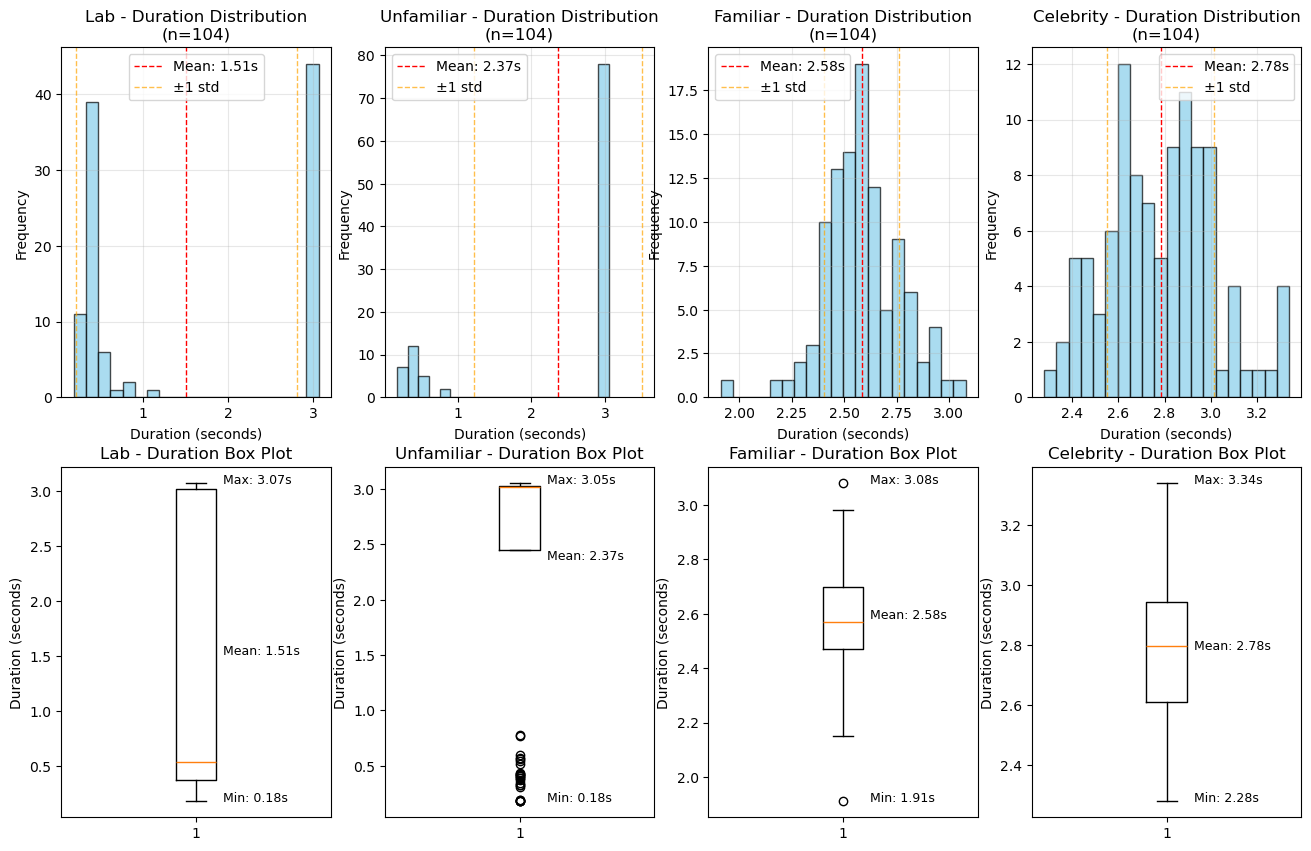

C:\Users\admin\AppData\Local\Temp\ipykernel_42860\2736858341.py:126: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(all_durations, labels=labels, vert=True)


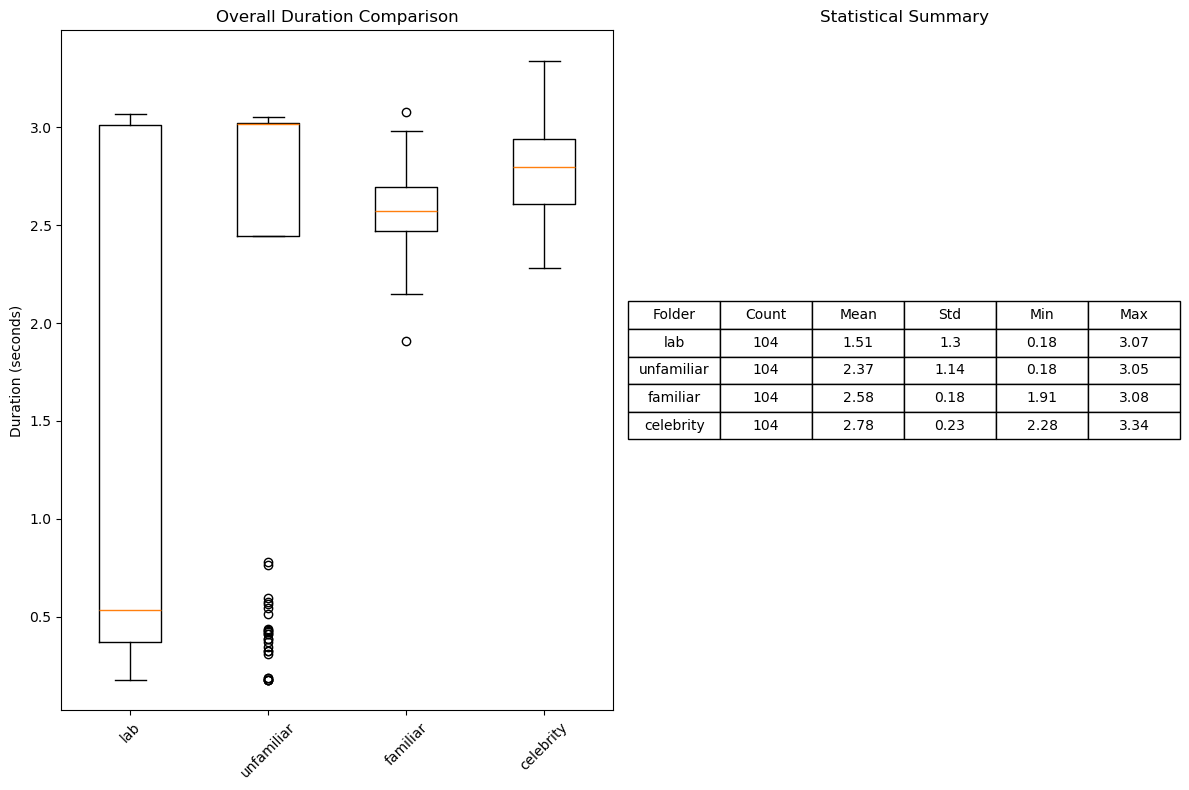


详细结果已保存到 'audio_duration_detailed.csv'

=== 总体统计摘要 ===
Lab: 104 个文件, 平均时长: 1.51秒
Unfamiliar: 104 个文件, 平均时长: 2.37秒
Familiar: 104 个文件, 平均时长: 2.58秒
Celebrity: 104 个文件, 平均时长: 2.78秒

=== 所有文件统一统计 ===
所有文件总数: 416
所有文件平均时长: 2.31 秒
所有文件时长标准差: 1.00 秒
所有文件最短时长: 0.18 秒
所有文件最长时长: 3.34 秒


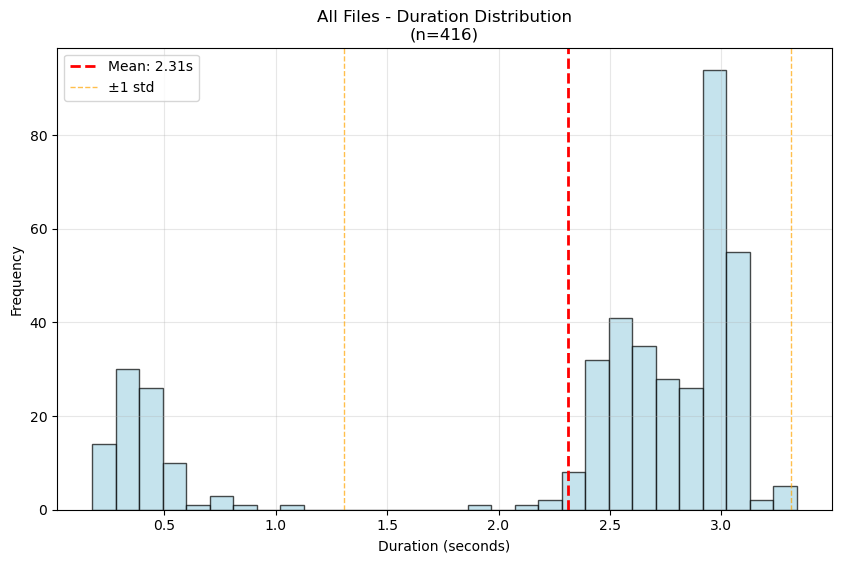


=== 排除sentence编号大于440的文件后统计 ===
过滤后文件总数: 352 (原总数: 416)
过滤后文件平均时长: 2.32 秒
过滤后文件时长标准差: 1.00 秒
过滤后文件最短时长: 0.18 秒
过滤后文件最长时长: 3.34 秒


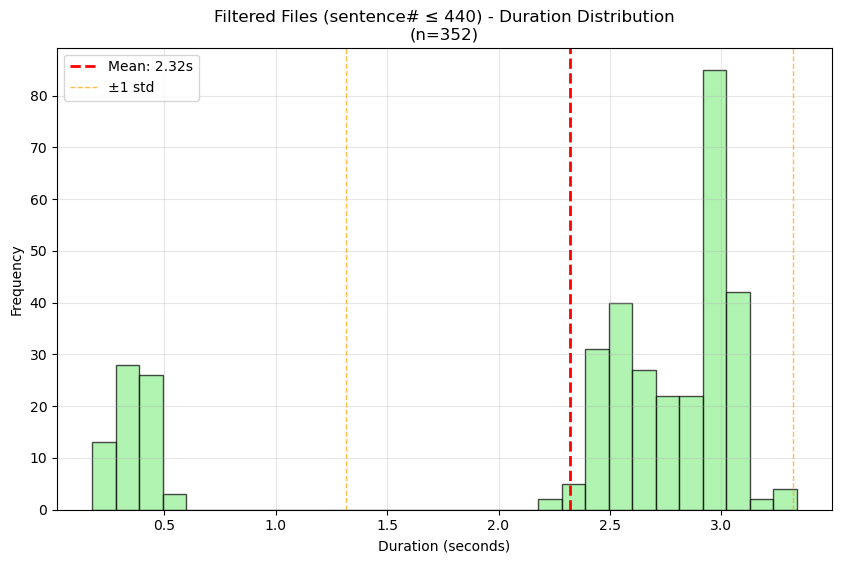


=== 各文件夹过滤后统计 ===
Lab: 88 个文件, 平均时长: 1.45秒
Unfamiliar: 88 个文件, 平均时长: 2.47秒
Familiar: 88 个文件, 平均时长: 2.59秒
Celebrity: 88 个文件, 平均时长: 2.77秒

过滤后详细结果已保存到 'filtered_audio_duration_detailed.csv'


In [29]:
import os
import wave
import numpy as np
import matplotlib.pyplot as plt
from scipy.io import wavfile
import pandas as pd
import re  # 导入正则表达式模块


def extract_sentence_number(filename):
    """从文件名中提取sentence后面的数字"""
    # 使用正则表达式匹配'sentence'后面的数字
    match = re.search(r'sentence(\d+)', filename, re.IGNORECASE)
    if match:
        return int(match.group(1))
    return 0  # 如果没有匹配到，返回0

# 定义基础路径
base_path = r'E:\Post_log\Voice_Imagery\Exp\Exp_preparation\Voice imagery task\Program_psychopy\Voice_imagery_task\Sub01\stimulus'
# 四个文件夹的名称
folders = ['lab', 'unfamiliar', 'familiar', 'celebrity']

# 存储所有结果的字典
all_results = {}

# 设置图形大小
plt.figure(figsize=(16, 10))

# 为每个文件夹创建子图
for i, folder in enumerate(folders):
    folder_path = os.path.join(base_path, folder)
    
    # 检查文件夹是否存在
    if not os.path.exists(folder_path):
        print(f"警告: 文件夹不存在 - {folder_path}")
        continue
    
    # 获取所有WAV文件
    wav_files = [f for f in os.listdir(folder_path) if f.endswith('.wav')]
    print(f"\n=== {folder}文件夹 ===")
    print(f"找到 {len(wav_files)} 个WAV文件")
    
    # 计算每个音频文件的时长
    durations = []
    valid_files = []
    
    file_duration_pairs = []  # 存储文件和时长的对应关系

    for file in wav_files:
        file_path = os.path.join(folder_path, file)
        duration = get_audio_duration(file_path)
        
        if duration is not None:
            # 将文件和时长作为元组存储
            file_duration_pairs.append((file, duration))
            durations.append(duration)
            valid_files.append(file)
    
    # 按照时长从大到小排序
    file_duration_pairs.sort(key=lambda x: x[1], reverse=True)
    
    print("\n按时长从大到小排序:")
    for j, (file, duration) in enumerate(file_duration_pairs, 1):
        print(f"{j}. {file}: {duration:.2f} 秒")
    
    # 转换为numpy数组以便计算统计量
    durations = np.array(durations)
    
    # 存储结果
    all_results[folder] = {
        'durations': durations,
        'valid_files': valid_files
    }
    
    # 计算统计量
    if len(durations) > 0:
        mean_duration = np.mean(durations)
        std_duration = np.std(durations)
        min_duration = np.min(durations)
        max_duration = np.max(durations)
        
        print(f"\n{folder}文件夹统计分析结果:")
        print(f"有效文件数量: {len(durations)}")
        print(f"平均时长: {mean_duration:.2f} 秒")
        print(f"时长标准差: {std_duration:.2f} 秒")
        print(f"最短时长: {min_duration:.2f} 秒")
        print(f"最长时长: {max_duration:.2f} 秒")
        
        # 创建子图 - 直方图
        plt.subplot(2, 4, i+1)
        n, bins, patches = plt.hist(durations, bins=20, alpha=0.7, color='skyblue', edgecolor='black')
        plt.axvline(mean_duration, color='red', linestyle='dashed', linewidth=1, label=f'Mean: {mean_duration:.2f}s')
        plt.axvline(mean_duration - std_duration, color='orange', linestyle='dashed', linewidth=1, alpha=0.7, label=f'±1 std')
        plt.axvline(mean_duration + std_duration, color='orange', linestyle='dashed', linewidth=1, alpha=0.7)
        plt.xlabel('Duration (seconds)')
        plt.ylabel('Frequency')
        plt.title(f'{folder.capitalize()} - Duration Distribution\n(n={len(durations)})')
        plt.legend()
        plt.grid(True, alpha=0.3)
        
        # 创建子图 - 箱线图
        plt.subplot(2, 4, i+5)
        plt.boxplot(durations, vert=True)
        plt.ylabel('Duration (seconds)')
        plt.title(f'{folder.capitalize()} - Duration Box Plot')
        
        # 添加值标签
        plt.text(1.1, min_duration, f'Min: {min_duration:.2f}s', fontsize=9)
        plt.text(1.1, max_duration, f'Max: {max_duration:.2f}s', fontsize=9)
        plt.text(1.1, mean_duration, f'Mean: {mean_duration:.2f}s', fontsize=9)
    else:
        print(f"{folder}文件夹中没有有效的音频文件")

plt.savefig(base_path + r'\duration_distribution.jpg', dpi=300)
plt.show()

# 创建总体比较图
plt.figure(figsize=(12, 8))

# 总体箱线图比较
plt.subplot(1, 2, 1)
all_durations = [all_results[folder]['durations'] for folder in folders if folder in all_results and len(all_results[folder]['durations']) > 0]
labels = [folder for folder in folders if folder in all_results and len(all_results[folder]['durations']) > 0]

if all_durations:
    plt.boxplot(all_durations, labels=labels, vert=True)
    plt.ylabel('Duration (seconds)')
    plt.title('Overall Duration Comparison')
    plt.xticks(rotation=45)
    
    # 添加统计信息表格
    plt.subplot(1, 2, 2)
    stats_data = []
    for folder in labels:
        durations = all_results[folder]['durations']
        stats_data.append([
            folder,
            len(durations),
            np.mean(durations),
            np.std(durations),
            np.min(durations),
            np.max(durations)
        ])
    
    # 创建表格
    columns = ['Folder', 'Count', 'Mean', 'Std', 'Min', 'Max']
    stats_df = pd.DataFrame(stats_data, columns=columns)
    
    # 隐藏坐标轴
    plt.axis('tight')
    plt.axis('off')
    
    # 创建表格
    table = plt.table(cellText=stats_df.round(2).values,
                     colLabels=stats_df.columns,
                     cellLoc='center',
                     loc='center')
    table.auto_set_font_size(False)
    table.set_fontsize(10)
    table.scale(1, 1.5)
    plt.title('Statistical Summary')

plt.tight_layout()
plt.savefig(base_path + r'\duration_distribution_comparison.jpg', dpi=300)
plt.show()

# 保存详细结果到CSV文件
detailed_results = []
for folder in folders:
    if folder in all_results and len(all_results[folder]['durations']) > 0:
        for i, file in enumerate(all_results[folder]['valid_files']):
            detailed_results.append({
                'Folder': folder,
                'Filename': file,
                'Duration(s)': all_results[folder]['durations'][i]
            })

if detailed_results:
    detailed_df = pd.DataFrame(detailed_results)
    detailed_df.to_csv(r'Sub01\audio_duration_detailed.csv', index=False, encoding='utf-8-sig')
    print("\n详细结果已保存到 'audio_duration_detailed.csv'")

# 打印总体统计摘要
print("\n=== 总体统计摘要 ===")
for folder in folders:
    if folder in all_results and len(all_results[folder]['durations']) > 0:
        durations = all_results[folder]['durations']
        print(f"{folder.capitalize()}: {len(durations)} 个文件, 平均时长: {np.mean(durations):.2f}秒")

# 新增部分1: 统一计算所有文件的时长统计
print("\n=== 所有文件统一统计 ===")
all_durations_combined = []
for folder in folders:
    if folder in all_results and len(all_results[folder]['durations']) > 0:
        all_durations_combined.extend(all_results[folder]['durations'])

if all_durations_combined:
    all_durations_combined = np.array(all_durations_combined)
    print(f"所有文件总数: {len(all_durations_combined)}")
    print(f"所有文件平均时长: {np.mean(all_durations_combined):.2f} 秒")
    print(f"所有文件时长标准差: {np.std(all_durations_combined):.2f} 秒")
    print(f"所有文件最短时长: {np.min(all_durations_combined):.2f} 秒")
    print(f"所有文件最长时长: {np.max(all_durations_combined):.2f} 秒")
    
    # 绘制所有文件的分布图
    plt.figure(figsize=(10, 6))
    plt.hist(all_durations_combined, bins=30, alpha=0.7, color='lightblue', edgecolor='black')
    plt.axvline(np.mean(all_durations_combined), color='red', linestyle='dashed', linewidth=2, 
                label=f'Mean: {np.mean(all_durations_combined):.2f}s')
    plt.axvline(np.mean(all_durations_combined) - np.std(all_durations_combined), 
                color='orange', linestyle='dashed', linewidth=1, alpha=0.7, label=f'±1 std')
    plt.axvline(np.mean(all_durations_combined) + np.std(all_durations_combined), 
                color='orange', linestyle='dashed', linewidth=1, alpha=0.7)
    plt.xlabel('Duration (seconds)')
    plt.ylabel('Frequency')
    plt.title(f'All Files - Duration Distribution\n(n={len(all_durations_combined)})')
    plt.legend()
    plt.grid(True, alpha=0.3)
    plt.savefig(base_path + r'\all_files_duration_distribution.jpg', dpi=300)
    plt.show()

# 新增部分2: 排除sentence编号大于440的文件后重新统计
print("\n=== 排除sentence编号大于440的文件后统计 ===")
filtered_durations = []
filtered_files = []

for folder in folders:
    if folder in all_results and len(all_results[folder]['durations']) > 0:
        for i, file in enumerate(all_results[folder]['valid_files']):
            # 提取sentence编号
            sentence_num = extract_sentence_number(file)
            
            # 只保留sentence编号小于等于440的文件
            if sentence_num <= 440:
                filtered_durations.append(all_results[folder]['durations'][i])
                filtered_files.append(file)

if filtered_durations:
    filtered_durations = np.array(filtered_durations)
    print(f"过滤后文件总数: {len(filtered_durations)} (原总数: {len(all_durations_combined)})")
    print(f"过滤后文件平均时长: {np.mean(filtered_durations):.2f} 秒")
    print(f"过滤后文件时长标准差: {np.std(filtered_durations):.2f} 秒")
    print(f"过滤后文件最短时长: {np.min(filtered_durations):.2f} 秒")
    print(f"过滤后文件最长时长: {np.max(filtered_durations):.2f} 秒")
    
    # 绘制过滤后文件的分布图
    plt.figure(figsize=(10, 6))
    plt.hist(filtered_durations, bins=30, alpha=0.7, color='lightgreen', edgecolor='black')
    plt.axvline(np.mean(filtered_durations), color='red', linestyle='dashed', linewidth=2, 
                label=f'Mean: {np.mean(filtered_durations):.2f}s')
    plt.axvline(np.mean(filtered_durations) - np.std(filtered_durations), 
                color='orange', linestyle='dashed', linewidth=1, alpha=0.7, label=f'±1 std')
    plt.axvline(np.mean(filtered_durations) + np.std(filtered_durations), 
                color='orange', linestyle='dashed', linewidth=1, alpha=0.7)
    plt.xlabel('Duration (seconds)')
    plt.ylabel('Frequency')
    plt.title(f'Filtered Files (sentence# ≤ 440) - Duration Distribution\n(n={len(filtered_durations)})')
    plt.legend()
    plt.grid(True, alpha=0.3)
    plt.savefig(base_path + r'\filtered_files_duration_distribution.jpg', dpi=300)
    plt.show()
    
    # 按文件夹分别统计过滤后的结果
    print("\n=== 各文件夹过滤后统计 ===")
    for folder in folders:
        if folder in all_results and len(all_results[folder]['durations']) > 0:
            folder_durations = []
            for i, file in enumerate(all_results[folder]['valid_files']):
                sentence_num = extract_sentence_number(file)
                if sentence_num <= 440:
                    folder_durations.append(all_results[folder]['durations'][i])
            
            if folder_durations:
                folder_durations = np.array(folder_durations)
                print(f"{folder.capitalize()}: {len(folder_durations)} 个文件, 平均时长: {np.mean(folder_durations):.2f}秒")
    
    # 保存过滤后的详细结果到CSV文件
    filtered_detailed_results = []
    for folder in folders:
        if folder in all_results and len(all_results[folder]['durations']) > 0:
            for i, file in enumerate(all_results[folder]['valid_files']):
                sentence_num = extract_sentence_number(file)
                if sentence_num <= 440:
                    filtered_detailed_results.append({
                        'Folder': folder,
                        'Filename': file,
                        'Sentence_Number': sentence_num,
                        'Duration(s)': all_results[folder]['durations'][i]
                    })
    
    if filtered_detailed_results:
        filtered_detailed_df = pd.DataFrame(filtered_detailed_results)
        filtered_detailed_df.to_csv(r'Sub01\filtered_audio_duration_detailed.csv', index=False, encoding='utf-8-sig')
        print("\n过滤后详细结果已保存到 'filtered_audio_duration_detailed.csv'")
else:
    print("没有找到符合条件的文件")